# Estadísticas de datos con Pandas

Semana Tec

Profesores: Luz Eunice Angeles / José Ignacio Treviño

## Métodos de los data frames

Los `DataFrame` son un tipo de **objeto** en Python, lo que quiere decir que tienen métodos y atributos asociados. De manera general, tenemos dos atributos y cuatro métodos que podemos utilizar para cualquier Data Frame:
* `shape`: Nos da las dimensiones (renglones y columnas) de la tabla
* `columns`: Regresa el nombre de las columnas
* `info()`: Nos permite ver el tipo de dato que hay en cada columa
* `describe()`: Regresa un resumen estadístico de las columnas numéricas
* `head()`: Selecciona los primeros n renglones de la tabla.
* `tail()`: Selecciona los últimos n renglones de la tabla.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [3]:
import numpy as np
import pandas as pd

Vamos a importar una tabla de datos de la calidad de vinos rojos. Las variables a considerar son las siguientes:
* fixed acidity (tartaric acid - g / dm^3)
* volatile acidity (acetic acid - g / dm^3)
* citric acid (g / dm^3)
* residual sugar (g / dm^3)
* chlorides (sodium chloride - g / dm^3
* free sulfur dioxide (mg / dm^3)
* total sulfur dioxide (mg / dm^3)
* density (g / cm^3)
* pH
* sulphates (potassium sulphate - g / dm3)
* alcohol (% by volume)
* quality (score between 0 and 10)

In [4]:
# Importar los datos
vinos_df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [5]:
# Imprimir las dimensiones del DF. Atributo
vinos_df.shape

(1599, 12)

In [6]:
# Imprimir las columnas del DF. Atributo
vinos_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Revisar el tipo de dato de cada columna. Método
vinos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Medidas de tendencia central y de dispersión

In [8]:
# Obtener un resumen de las columnas numéricas. Método
# Similar al summary() en R
vinos_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Muestra las primeras 4 líneas de la tabla
vinos_df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [10]:
# Muestra las últimas 6 líneas de la tabla
vinos_df.tail(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


El método describe nos ayuda a sacar estadísticas sobre todas las variables (columnas) numéricas de la tabla. Los estadísticos que obtenemos son:
* El número de observaciones (renglones no vacíos)
* La media y desviación estándar.
* Los percentiles 25, 50 (mediana), 75.
* Valores máximo y mínimo.

Estas métricas las podemos calcular individualmente para cada columna e incluso podemos aplicarlos a un subconjunto de la tabla (aplicando filtros).

## Matriz de correlación.

Cuando trabajamos con varias variables numéricas, nos interesa saber si hay un tipo de **relación entre ellas**. Esta relación puede ser positiva o negativa:
* Si dos variables tienen una relación positiva, cuando una crece en valor la otra también crece.
* Si dos variables tienen una relación negativa, cuando una crece en valor la otra disminuye.

Una métrica para esta relación es la **correlación de Pearson**. 

$$ \rho = \frac{\text{Cov}(x,y)}{\sigma_x \sigma_y} $$

donde `Cov(x,y)` es la covarianza de los datos $x$, $y$; $\sigma_x$ y $\sigma_y$ son las desviaciones estándar de $x$,$y$ respectivamente.

La correlación va de `-1` a `1`. 
* El valor de 1 significa que las dos variables tienen una *relación lineal* perfecta. Cuando una variable crece, la otra también.
* El valor de -1 significa que las dos variables tienen una *relación lineal negativa* perfecta. Mientras una variable crece, la otra disminuye.
* El valor de 0 significa que no hay *relación lineal* entre las variables. No significa que no haya una relación entre las variables. 

En Pandas, podemos calcular la correlación de Pearson con el método `.corr()`

In [ ]:
vinos_df.corr()

La matriz de correlación es **cuadrada y simétrica**, tiene el mismo número de columnas que renglones. Cada celda representa la intersección de dos variables, y el contenido representa el valor de la correlación. 

Una variable siempre tiene una correlación de 1 consigo misma.

## Estadísticas de variables categóricas

Para las columnas que no sean numéricas, el método **describe** no nos brinda ningún tipo de resumen. Sin embargo, podemos hacer otro tipo de análisis para las variables que son texto, o bien, que representen una *categoría*.

Una **variable categórica** es una variable que puede tomar uno de un número limitado, y por lo general fijo, de posibles valores. Por lo tanto, una de las principales operaciones que podemos realizar con estas variabels es contar cuántas apariciones tiene cada uno de los diferentes valores o *niveles*.

El método `.value_counts()` cuenta el número de apariciones que tiene cada elemento distinto de una columna o una variable. 

In [25]:
vinos_df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [26]:
# La columna "quality" es numérica, pero son valores discretos que también podemos
# considerar como categorías.
vinos_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

En el caso anterior, los vinos con calidad *5* son los que tienen **más apariciones**. Al valor que más se repite en una columna o variable se le conoce como **moda**.

Para obtener los distintos elementos que hay en la columna *quality*,  utilizamos el método unique.

In [27]:
# Obtener los niveles o valores distintos de la columna quality
vinos_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [28]:
# Si los queremos ordenados, podemos agregar usar la función sort de numpy
np.sort(vinos_df['quality'].unique())

array([3, 4, 5, 6, 7, 8])

 ## Estadísticas y agrupaciones.
 
Muchas veces los estadísticos de las columnas no son suficientes para proporcionar todo el detalle o para responder a preguntas específicas que se tengan sobre los datos. Hay ocaciones en las que nos interesa obtener estadísticos para **diferentes grupos** o separaciones. 

Retomando el ejemplo anterior, quizás nos interese conocer el nivel de alcohol promedio **dependiendo** de la calidad del vino. Esto nos ayudará a comparar esta característica (nivel de alcohol) para diferentes *niveles* de una variable categórica (calidad). 

Esto lo podemos hacer con el método `groupby()` de un data frame:

```python
df.groupby(['Variables','agrupadoras']).metrica()['Columna calculada']
```

* Lo que va adentro del `groupby` son las columnas agrupadoras. Es decir, vamos a dividir la tabla grupos definidos por la combinación de los diferentes valores de las columnas agrupadoras. Puede ser una o varias.

* El método de *métrica* puede ser cualquiera de los estadísticos que vimos anteriormente (min, max, count, mean, std, sum).

* La columna que está entre brackets es sobre la que queremos hacer la operación.

In [21]:
# Calcular el nivel de alcohol promedio por cada nivel de calidad
vinos_df.groupby('quality').mean()['alcohol']

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [ ]:
# Calcular el nivel promedio de alcohol y pH para cada nivel de calidad
# Como son dos columnas, utilizamos brackets para definir una lista
vinos_df.groupby('quality').mean()[['alcohol', 'pH']]

In [ ]:
# Calcular el nivel promedio de cloruros por calidad y nivel de ph de los vinos
# Como son dos variables, utilizamos los brackets para hacer una lista
vinos_df.groupby(['quality', 'pH']).mean()['chlorides']

In [ ]:
# Calcular el nivel promedio de cloruros y azúcar residual por calidad y nivel de ph de los vinos
# Como son dos variables, utilizamos los brackets para hacer una lista
vinos_df.groupby(['quality', 'pH']).mean().loc[:, ['chlorides', 'residual sugar']]

## Estadísticas de columnas individuales (Extra)

In [22]:
# El número de elementos (observaciones) en una columna
vinos_df.loc[:, 'density'].count()

1599

In [23]:
# Si queremos contar cuantos renglones hay con valores no vacíos, usamos el método isna
vinos_df['density'].isna().sum()

0

In [24]:
# La media y la desviación estándar son medidas de tendencia central y de dispersión, respectivamente.
sulfuro_promedio = vinos_df['free sulfur dioxide'].mean()

# El parámetro ddof en la desviación estándar es para que la división sea por n-1 en vez de n
# ¿Para qué hacemos esto? ¿En qué casos se utiliza? (degrees of freedom)
sulfuro_desv_est = vinos_df['free sulfur dioxide'].std(ddof=1)

# Otra medida de dispersión es la varianza, que es el cuadrado de la desviación estándar.
sulfuro_var      = vinos_df['free sulfur dioxide'].var(ddof=1)


print('Media:', sulfuro_promedio)
print('Desviación estándar:', sulfuro_desv_est)
print('Varianza:', sulfuro_var)

Media: 15.874921826141339
Desviación estándar: 10.46015696980973
Varianza: 109.41488383305908


Si queremos imprimir con un formato específico (a 3 decimales por ejemplo) usamos el método `.format` para los strings (o texto). 

```python
'texto {:s}, {:d}, {:.3f}'.format(variable1, variable2,variable3)
```

Lo que está entre llaves `{}` se va a sustituir por el contenido de las variables en el mismo orden en el que aparecen dentro del método `format`:
* `{:s}` se sustituye por el contenido de la *variable1*. `:s` se refiere a un formato de texto: para números coloca todos los decimales. Para Strings, se escribe todo el texto.

* `{:d}` se sustituye por el contenido de la *variable2*. `:d` se refiere a formato de número entero. Sólo podemos mandar variables de tipo *integer*.

* `{:.3f}` se sutituye por el contenido de la *variable3*. `:.#f` se refiere a formato de número de punto flotante (con decimales). El 3 en este caso especifíca que el número se redondeará a **3** decimales. Si colocamos {:.0f}, el número se redondea a  un entero.

In [ ]:
# A 3 decimales
print('La media es {:.3f}, y la desviación estándar es {:.3f}'.format(sulfuro_promedio, 
                                                                      sulfuro_desv_est))
# A 2 decimales. 
print('Media: {:.2f}'.format(sulfuro_promedio))
print('Desviación estándar: {:.2f}'.format(sulfuro_desv_est))
print('Varianza: {:.2f}'.format(sulfuro_var))

In [ ]:
# El máximo y mínimo de una columna los obtenemos con los métodos .max() y .min()
# .loc es el método para acceder a un subconjunto de datos en Pandas.
densidad_min = vinos_df.loc[:, 'density'].min()
densidad_max = vinos_df.loc[:, 'density'].max()

print('Densidad mínima: {:.3f}'.format(densidad_min))
print('Densidad máxima: {:.3f}'.format(densidad_max))

Los percentiles son otra manera de medir el centro y la dispersión de los datos. La **mediana** o el percentil 50 representa el dato que se encuentra exactamente en el medio cuando ordenamos una columna en orden ascendente. Para un conjunto de datos *balanceado*, la mediana debería tener un valor muy similar al promedio (o media). 

In [ ]:
# Calcular la media y mediana de la densidad
densidad_promedio = vinos_df.loc[:, 'density'].mean()
densidad_mediana  = vinos_df.loc[:, 'density'].median()

print('La media es: {:.3f}'.format(densidad_promedio))
print('La mediana es: {:.3f}'.format(densidad_mediana))

Los percentiles 25 y 75 nos representan lo que se conoce como el **primer cuartil** y **tercer cuartil**, respectivamente. El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo. 

Por ejemplo: el primer cuartil o percentil 25 es el número que indica que debajo de éste está el 25% de los datos de una variable cuando se ordenan de menor a mayor.

El tercer y primer cuartil son métricas que utilizamos para calcular el **rango intercuartil**. Esta medida es una alternativa a la *desviación estándar* cuando tenemos datos que tienen valores *atípicos*.

$$IQR = \text{Tercer Cuartil} - \text{Primer Cuartil}$$

In [ ]:
# Calcular el primer y tercer cuartiles
densidad_1er_cuartil = vinos_df.loc[:, 'density'].quantile(0.25)
densidad_3er_cuartil = vinos_df.loc[:, 'density'].quantile(0.75)

# Calcular la desviación estándar
densidad_desv_est    = vinos_df.loc[:, 'density'].std(ddof=1)

# Para datos con una DISTRIBUCIÓN NORMAL, el IQR es ligeramente menor que 2 veces la desviación estándar
IQR = densidad_3er_cuartil-densidad_1er_cuartil

# Comparar las métricas
print('El primer cuartil es: {:.3f}'.format(densidad_1er_cuartil))
print('El tercer cuartil es : {:.3f}'.format(densidad_3er_cuartil))

print('El IQR es : {:.4f}'.format(IQR))
print('La desviación estándar es: {:.4f}'.format(densidad_desv_est))

In [ ]:
vinos_df.head()

# Visualización de datos con Python y Pandas (Extra)

La libería más famosa y utilizada para crear visualizaciones en Python se llama **matplotlib**. Esta librería está inspirada en los gráficos de *Matlab* y nos permite controlar a detalle los elementos que queremos desplegar. *Pandas* tiene integrados métodos para crear gráficos rápidamente y que utilizan *matplotlib* para realizarlo.

Hay otras librerías más especializadas que nos simplifican la creación de gráficos con alta calidad visual (como **seaborn**) o que nos permiten tener gráficos interactivos tipo *dashboard* (como **Plotly**).

Para empezar, vamos a utilizar los métodos que vienen incluidos en los DataFrames de Pandas.

In [11]:
# Lo primero es importar las librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Este comando hace que las gráficas se vean mejor.
sns.set()

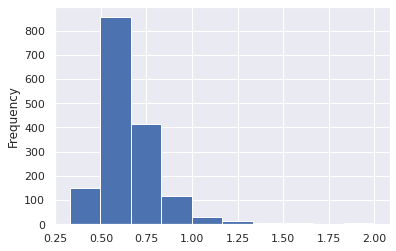

In [12]:
# Para graficar una variable numérica, la gráfica más básicas es el histograma
vinos_df['sulphates'].plot(kind='hist')

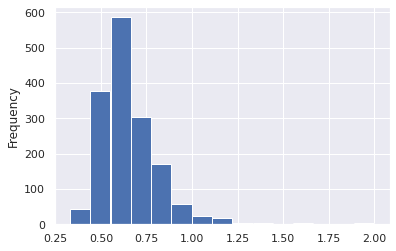

In [13]:
# Podemos controlar cuántas cajas (bins) o barras dibujar con el parámetro n_bins
# Por defecto son 10
vinos_df['sulphates'].plot(kind='hist', bins=15)

El histograma es una representación de la *densidad* de una variable numérica. 

* Para graficar un histograma, dividimos el rango de los datos numéricos en cajas y contamos cuántos elementos se encuentran dentro de esas cajas (*bins*)

* Podemos definir el **ancho** de las cajas o bien el **número** de cajas.

* Pandas nos ofrece un método para dividir una columna en los mismos intervalos que en un histograma. Este método nos genera **etiquetas** de la caja a la que pertenece.
* 

In [14]:
# El método Cut etiqueta a cada uno de los datos de una columna con la caja a la que pertenecen.
pd.cut(vinos_df['sulphates'], bins=15)

0       (0.553, 0.664]
1       (0.664, 0.775]
2       (0.553, 0.664]
3       (0.553, 0.664]
4       (0.553, 0.664]
             ...      
1594    (0.553, 0.664]
1595    (0.664, 0.775]
1596    (0.664, 0.775]
1597    (0.664, 0.775]
1598    (0.553, 0.664]
Name: sulphates, Length: 1599, dtype: category
Categories (15, interval[float64]): [(0.328, 0.441] < (0.441, 0.553] < (0.553, 0.664] <
                                     (0.664, 0.775] ... (1.555, 1.666] < (1.666, 1.777] <
                                     (1.777, 1.889] < (1.889, 2.0]]

El método `cut` genera una nueva columna que es de tipo **categorical**. La diferencia con una columna tradicional de texto, una columna categórica guarda los diferentes valores posibles que puede haber y no permite que introduzcamos otros valores.

In [15]:
# Para obtener las diferentes cajas utilizamos el método cat.categories
pd.cut(vinos_df['sulphates'], bins=15).cat.categories

IntervalIndex([(0.328, 0.441], (0.441, 0.553], (0.553, 0.664], (0.664, 0.775], (0.775, 0.887] ... (1.443, 1.555], (1.555, 1.666], (1.666, 1.777], (1.777, 1.889], (1.889, 2.0]],
              closed='right',
              dtype='interval[float64]')

In [16]:
# Contemos la categorías con la función len
len(pd.cut(vinos_df['sulphates'], bins=15).cat.categories)

15

In [17]:
# Si usamos la función Cut con el método value_counts, obtendremos los valores para crear el
# histograma. Pasamos el argumento para no ordenar por frecuencia.
pd.cut(vinos_df['sulphates'], bins=15).value_counts(sort=False)

(0.328, 0.441]     42
(0.441, 0.553]    378
(0.553, 0.664]    586
(0.664, 0.775]    304
(0.775, 0.887]    172
(0.887, 0.998]     58
(0.998, 1.109]     24
(1.109, 1.221]     18
(1.221, 1.332]      5
(1.332, 1.443]      4
(1.443, 1.555]      0
(1.555, 1.666]      4
(1.666, 1.777]      0
(1.777, 1.889]      0
(1.889, 2.0]        4
Name: sulphates, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd239c275d0>,
      dtype=object)

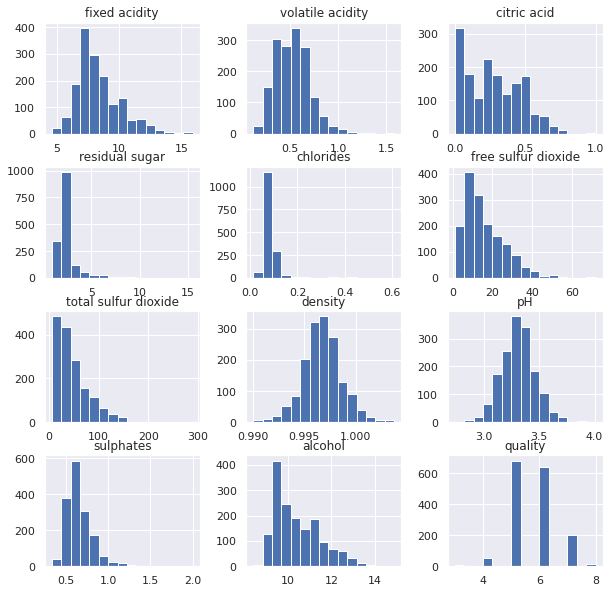

In [18]:
# El método .hist de un DataFrame grafica un histograma para toda las columnas numéricas
# Con figsize podemos cambiar el tamaño de las imágenes
vinos_df.hist(figsize=(10,10), bins=15)

Otro tipo de visualización para mostrar una *variable numérica* es la gráfica de caja y bigote (boxplot). No presenta tanta información como el histograma pero sí da detalles de la densidad.

Este gráfico es muy útil cuando queremos comparar *varias variables numéricas* o una *variable numérica dividida por una variable categórica*.

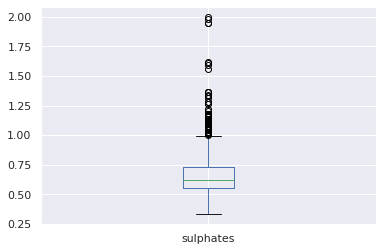

In [19]:
# Boxplot de una variable
vinos_df['sulphates'].plot(kind='box')

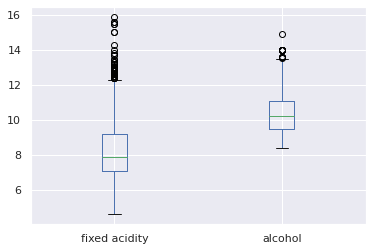

In [20]:
# Seleccionamos dos columnas y luego hacemos el boxplot
vinos_df.loc[:, ['fixed acidity', 'alcohol']].plot(kind='box')

Si queremos comparar la **relación** entre **dos variables numéricas**, podemos utilizar un **gráfico de dispersión**. En esta gráfica, cada variable representa una *coordenada* en un plano cartesiano y cada observación es representada como un punto con coordenadas que van de acuerdo al valor de las variables.



In [ ]:
# Gráfico para ver la relación entre la cantidad libre de SO2 y la cantidad total de SO2
vinos_df.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide')

Para graficar **variables categóricas**, utilizamos un gráfico de barras. La diferencia con un histograma es que en el eje $x$ colocamos los diferentes *niveles* o categorías de la variable.

La altura de las barras corresponde a la cantidad de ocurrencias de cada categoría en la columa. Este dato suena conocido. ¿Cómo lo calculamos?

In [ ]:
# Obtenemos las ocurrencias de cada categoría con value_count
vinos_df['quality'].value_counts().plot(kind='bar')

Los gráficos de barra normalmente van ordenados, ya sea en orden ascendente o descendente. 